In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 
reg=XGBClassifier()


In [2]:
heart_data = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
heart_data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
heart_data.shape

(299, 13)

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heart_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


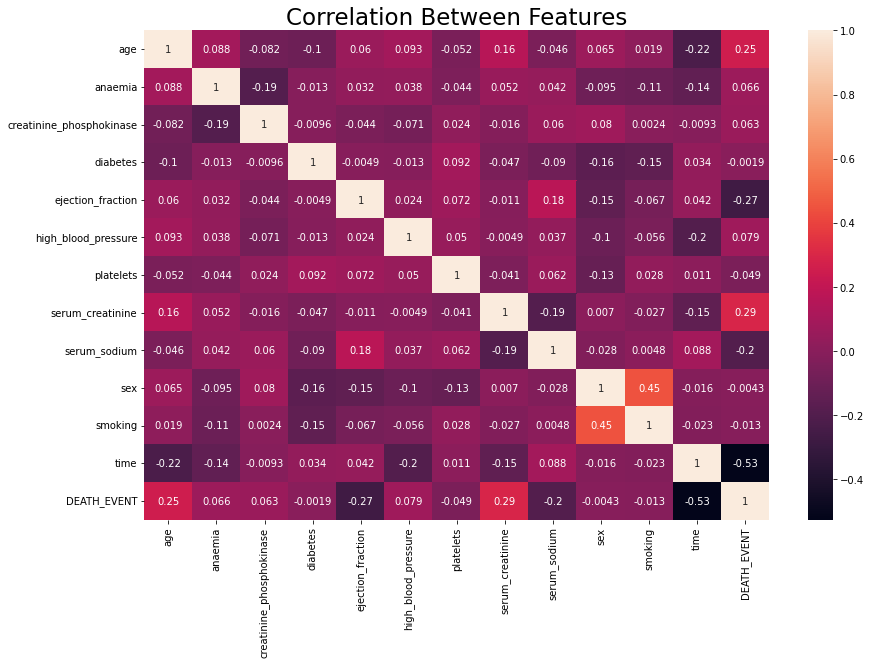

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,9))
sns.heatmap(heart_data.corr(), annot=True)
plt.title("Correlation Between Features", fontsize=23)
plt.show()

In [8]:
heart_data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
heart_data[heart_data.columns[0:]].corr()['DEATH_EVENT'][:].sort_values(ascending=False)

DEATH_EVENT                 1.000000
serum_creatinine            0.294278
age                         0.253729
high_blood_pressure         0.079351
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
sex                        -0.004316
smoking                    -0.012623
platelets                  -0.049139
serum_sodium               -0.195204
ejection_fraction          -0.268603
time                       -0.526964
Name: DEATH_EVENT, dtype: float64

## EDA
##### Visualize Features Independently

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


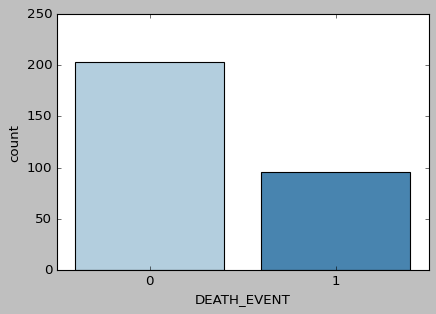

In [10]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(heart_data['DEATH_EVENT'], palette="Blues")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


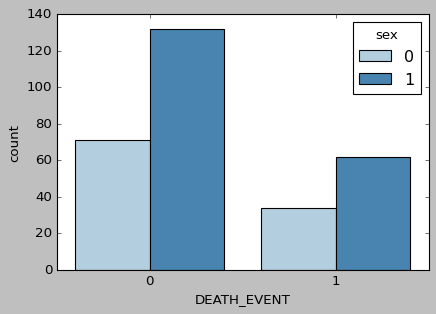

In [11]:
plt.style.use('classic')
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(heart_data['DEATH_EVENT'], hue=heart_data['sex'], palette='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


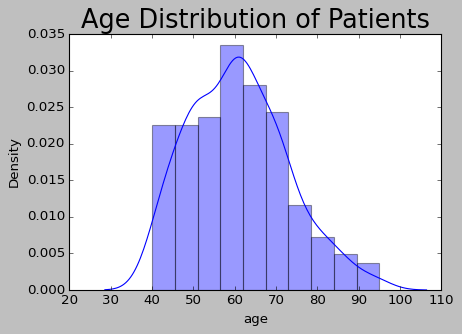

In [12]:
#The age distribution 

plt.style.use('classic')
fig, ax = plt.subplots(figsize=(6,4))
sns.distplot(heart_data['age'], color='b')
plt.title("Age Distribution of Patients", fontsize=23)
plt.show()

The above plot shows that risk of heart disease increases with age from 40 and at peak once 60 with a decline after 60years. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


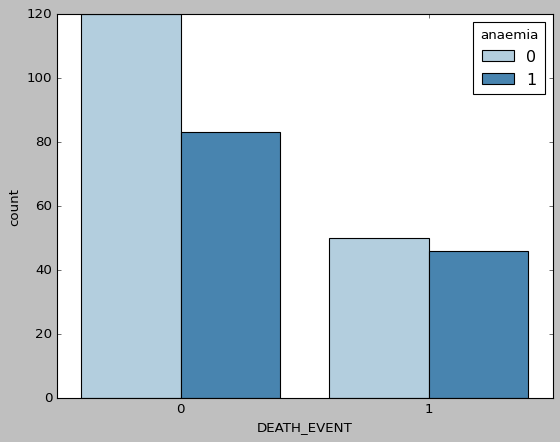

In [13]:
sns.countplot(heart_data['DEATH_EVENT'], hue=heart_data['anaemia'], palette='Blues')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


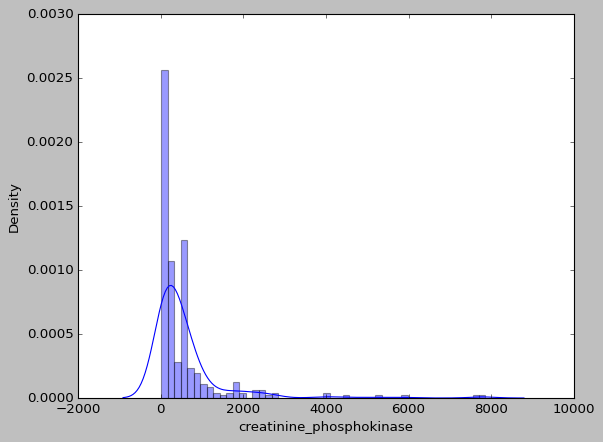

In [14]:
sns.distplot(heart_data['creatinine_phosphokinase'])

In [16]:
heart_data.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1


In [17]:
heart_data['age'] = heart_data['age'].astype(int)
heart_data['platelets'] = heart_data['platelets'] .astype(int)
heart_data['serum_creatinine'] = heart_data['serum_creatinine'].astype(int)

In [18]:
X = heart_data.drop(['DEATH_EVENT'], axis=1)
y = heart_data['DEATH_EVENT']

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

params={"n_estimators":[67],'reg_lambda':[2],'gamma':[0.1]
       ,'eta':[0.05],"max_depth":[3],'objective':['binary:logistic']}

clf=GridSearchCV(reg,params,cv=10,n_jobs=-1,verbose=1)
clf.fit(X_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'eta': [0.05], 'gamma': [0.1], 'max_depth': [3],
                         'n_estimators': [67], 'objective': ['binary:logistic'],
                         'reg_lambda': [2]},
             verbose=1)

In [20]:
ypred=clf.predict(X_train)
tpred=clf.predict(X_test)
print(accuracy_score(ypred,y_train))
print(accuracy_score(tpred,y_test))
clf.best_params_

0.9539748953974896
0.7


{'eta': 0.05,
 'gamma': 0.1,
 'max_depth': 3,
 'n_estimators': 67,
 'objective': 'binary:logistic',
 'reg_lambda': 2}

In [21]:
first_model = RandomForestClassifier(n_estimators = 10, criterion = 'entropy',
                                  random_state = 42)
first_model.fit(X_train, y_train)

pred_y = first_model.predict(X_test)

preds = first_model.predict(X_train)

print("Accuracy:", accuracy_score(y_test, pred_y))

Accuracy: 0.7


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

gbrt = GradientBoostingClassifier(random_state = 0, max_depth = 1)
gbrt.fit(X_train, y_train)


print("Accuracy on training set:", gbrt.score(X_train, y_train))
print("Accuracy on test set:", gbrt.score(X_test, y_test))

Accuracy on training set: 0.8973214285714286
Accuracy on test set: 0.8533333333333334


In [23]:
from sklearn import linear_model

In [24]:
Xx = (X - np.min(X))/(np.max(X)-np.min(X)).values

X_train, X_test, y_train, y_test = train_test_split(Xx, y, test_size=0.3)


logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 200)
print("test accuracy: {}% ".format((logreg.fit(X_train, y_train).score(X_test, y_test))*100))
print("train accuracy: {}%".format((logreg.fit(X_train, y_train).score(X_train, y_train))*100))

test accuracy: 86.66666666666667% 
train accuracy: 83.25358851674642%
